In [37]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline

Using the digits database and scikit-learn

1. Split your data into 30% test and 70% training sets, 
2. For each of the values of $C = 10^{k}$ for $k = {-10,...,10}$ train an $L^{2}$ regularized logistic regression model with regularization weight lambda = $\frac{1}{C}$  (this is the default form for scikit-learn) on the training set and compute the mean accuracy on the test set for each model.  Which performed best?  
3. Repeat #2 with $L^{1}$ regularization instead of $L^{2}$.  Do the results suggest any features that can be dropped from the data set?
4. Scikit-learn does not have logistic regression without regularization.  What values of $C$ are most similar to an un-regularized model?

In [3]:
# 1) Split the data into .3 test and .7 train
digits = datasets.load_digits()
xtrain, xtest, ytrain, ytest = train_test_split(digits['data'], 
                                                digits['target'], 
                                                test_size=.3, 
                                                train_size=.7)

In [4]:
# 2) Train models - L2 Norm
accuracy = []

# iterate through k
for k in range(-10,11):
    c = 10**k
    # train and predict model for given c
    model = LogisticRegression(penalty = 'l2', C=c)
    model.fit(xtrain, ytrain)
    ypredict = model.predict(xtest)
    accuracy.append((k,np.mean(ypredict==ytest)))
    
# sort accuracies to find the best value of c
accuracy = sorted(accuracy, key=lambda x: x[1], reverse=True)
print("Best value of k = {} with accuracy of {}".format(accuracy[0][0], accuracy[0][1]))

Best value of k = -2 with accuracy of 0.962962962963


In [5]:
# 3) Train models - L1 Norm
accuracy = []

# iterate through k
for k in range(-10,11):
    c = 10**k
    # train and predict model for given c
    model = LogisticRegression(penalty = 'l1', C=c)
    model.fit(xtrain, ytrain)
    ypredict = model.predict(xtest)
    accuracy.append((k,np.mean(ypredict==ytest)))
    
# sort accuracies to find the best value of c
accuracy = sorted(accuracy, key=lambda x: x[1], reverse=True)
print("Best value of k = {} with accuracy of {}".format(accuracy[0][0], accuracy[0][1]))

Best value of k = -1 with accuracy of 0.962962962963


Coefficients that are zero across all 10 classification models:
[0, 1, 7, 8, 15, 16, 23, 24, 31, 32, 39, 40, 47, 48, 55, 56, 57]


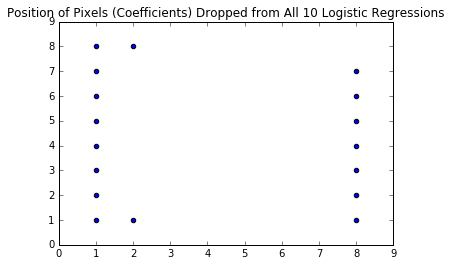

In [21]:
c = 10**-1
model = LogisticRegression(penalty = 'l1', C=c)
model.fit(xtrain, ytrain)

# to evaluate if any features are less-essential, 
# we will go through the 64 features and see which 
# are consistently 0 across all 10 classification models
zeros = np.zeros_like(model.coef_[:,0])
dropped_coefs = []
for i in range(len(model.coef_[0])):
    if np.all(model.coef_[:,i] == zeros):
        dropped_coefs.append(i)
        
print("Coefficients that are zero across all 10 classification models:\n{}".format(dropped_coefs))
dropped_coefs = np.array(dropped_coefs)
plt.scatter(dropped_coefs%8 + 1, dropped_coefs//8 + 1)
plt.title('Position of Pixels (Coefficients) Dropped from All 10 Logistic Regressions')
plt.show()

Part 4) Large values of C are most similar to unregularized model because the larger C is the smaller the regularization weight is (1/C) thus the less the optimizing process will be penalized/changed by the size of the norm of the coefficients.

Identify a classification problem related to your final project, using your project data.  

1. Apply $L^2$ regularized logistic regression to model this with an appropriate choice of $C$ (or lambda).  Discuss how (and why) you chose your specific the value $C$.  
2. Apply $L^1$ regularized logistic regression to model this with an appropriate choice of $C$.  Discuss how (and why) you chose your specific value of $C$.  
3. Identify which features of your data to include and which to discard for a good logistic regression model for your problem.  Compare which features are suggested for removal by $L^1$ regularization (from `scikit-learn) versus using the methods we have used for linear regression, including p-values, BIC, and AIC (from statsmodels).  
Clearly identify your final preferred model, and explain why you chose that over the other contenders. 
What conclusions can be drawn from your results about the original classification question you asked?

To be candid, as of my current data there's not really any classification problem going on. The closest thing there is in the dataset is that I have an indicator for whether or not a day is on a weekend or not, and that was used as an explanatory variable for the models I estimated. Beyond that, I could fabricate classifications based on whether or not something is above or below certain thresholds, but I can't really think of any compelling reason why any of thsoe would give useful results. So, I'll just use the percent of UK purchases to predict whether or not it's a weekend and I'll use the total number of purchases to predict whether or not it's a weekend. Also, in this part of the dataset I only have 58 observations because they are daily aggregated observations, so I will be in danger of overfitting and sacrificing 10% of my data to validate is costly.

To find the right value of C, I will do the same as above and iterate over possible values of $10^k$ for $k$ in ${-10, ... , 10}$ and choose the one that has the highest accuracy

In [23]:
df = pd.read_csv('purchases.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [25]:
df.head()

,Unnamed: 0,AUD_to_GBP,NEpurchases,UKpurchases,USpurchases,date,pctUKpurchases,weekend,AUD_to_GBP2
0,0,0.507761,838.849246,697848.116857,1.874951e+06,2016-06-20,0.271152,0,0.257822
1,1,0.508658,502.963546,689378.326053,1.504030e+06,2016-06-21,0.314223,0,0.258733
2,2,0.510217,856.491542,535229.615066,3.673902e+06,2016-06-22,0.127133,0,0.260321
3,3,0.513378,248.206220,457024.954462,1.698697e+06,2016-06-23,0.211981,0,0.263557
4,4,0.546301,390.193942,37645.488798,1.053211e+06,2016-06-24,0.034498,0,0.298445


In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['NEpurchases', 'UKpurchases', 'USpurchases', 'pctUKpurchases']], 
                                                df['weekend'], test_size = .2, train_size=.8)

In [44]:
# First we consider a model with the pct of goods purchases from the UK
accuracy = []
for k in range(-10,11):   
    c = 10**k
    # train and predict model for given c
    model = LogisticRegression(penalty = 'l2', C=c)
    model.fit(xtrain['pctUKpurchases'].values.reshape(-1,1), ytrain)
    ypredict = model.predict(xtest['pctUKpurchases'].values.reshape(-1,1))
    accuracy.append((k,np.mean(ypredict==ytest)))

accuracy = sorted(accuracy, key=lambda x: x[1], reverse=True)
print("Best value of k = {} with accuracy of {}".format(accuracy[0][0], accuracy[0][1]))

Best value of k = 1 with accuracy of 0.916666666667


In [45]:
# Next we consider a model with total Australian consumer expenditures on companies from
# the Netherlands, UK, and US
accuracy = []
for k in range(-10,11):   
    c = 10**k
    # train and predict model for given c
    model = LogisticRegression(penalty = 'l2', C=c)
    model.fit(xtrain[['NEpurchases', 'UKpurchases', 'USpurchases']], ytrain)
    ypredict = model.predict(xtest[['NEpurchases', 'UKpurchases', 'USpurchases']])
    accuracy.append((k,np.mean(ypredict==ytest)))

accuracy = sorted(accuracy, key=lambda x: x[1], reverse=True)
print("Best value of k = {} with accuracy of {}".format(accuracy[0][0], accuracy[0][1]))

Best value of k = -10 with accuracy of 0.916666666667


In [46]:
# Here, we only consider the second model since we want to see if it 
# is going to drop any of the features
accuracy = []
for k in range(-10,11):   
    c = 10**k
    # train and predict model for given c
    model = LogisticRegression(penalty = 'l1', C=c)
    model.fit(xtrain[['NEpurchases', 'UKpurchases', 'USpurchases']], ytrain)
    ypredict = model.predict(xtest[['NEpurchases', 'UKpurchases', 'USpurchases']])
    accuracy.append((k,np.mean(ypredict==ytest)))

accuracy = sorted(accuracy, key=lambda x: x[1], reverse=True)
print("Best value of k = {} with accuracy of {}".format(accuracy[0][0], accuracy[0][1]))

Best value of k = 0 with accuracy of 1.0


In [47]:
# Next, we look at the features to see if they should be dropped
c = 1
# train and predict model for given c
model = LogisticRegression(penalty = 'l1', C=c)
model.fit(xtrain[['NEpurchases', 'UKpurchases', 'USpurchases']], ytrain)
ypredict = model.predict(xtest[['NEpurchases', 'UKpurchases', 'USpurchases']])
accuracy.append((k,np.mean(ypredict==ytest)))
model.coef_

array([[  1.02992958e-03,   7.97248066e-06,  -1.24400165e-05]])

We see here that UK Purchases and US purchases are the smallest in magnitued, suggesting perhaps that they are the least significant. 

In [48]:
# estimate model1
model1 = sm.Logit(df['weekend'], df[['pctUKpurchases']])
results1 = model1.fit()
print(results1.summary())

# estimate model1
model2 = sm.Logit(df['weekend'], df[['NEpurchases', 'UKpurchases', 'USpurchases']])
results2 = model2.fit()
print(results2.summary())

Optimization terminated successfully.
         Current function value: 0.680794
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                weekend   No. Observations:                   58
Model:                          Logit   Df Residuals:                       57
Method:                           MLE   Df Model:                            0
Date:                Fri, 19 Jan 2018   Pseudo R-squ.:                 -0.1558
Time:                        01:44:04   Log-Likelihood:                -39.486
converged:                       True   LL-Null:                       -34.162
                                        LLR p-value:                       nan
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
pctUKpurchases    -1.0965      0.928     -1.181      0.238        -2.916     0.723
Optimization term

Here's some interesting results, we seet hat NE Purchases are the least significant of the variables in the second model, where I would have guessed it was the most significant from the Scikit Learn regressions coefficient results, since it's coefficient is the largest. Perhaps there is ust more variance in the data resulting in more ambiguity regarding it's true effect. Because of that, if this was something I thought was important to predict (which I don't think it is), I would choose the model with UK Purchases and US Purchases since they are both significant. My gut feeling is to trust these results backed-up with statistical theory than the results from algorithms because I am less familiar with them.